# Team Analysis

### Re-runable code for team names and top players in the StatsBomb data sets.

Basic team analysis on StatsBomb free data. This considers all .JSON files within the free data collection so that team name variable can be replaced with any other team from the 2018 FIFA World Cup.


In [12]:
# import relevant libraries
%matplotlib inline
import json
import matplotlib as plt; plt.rcdefaults()
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from functools import reduce
from scipy.spatial import ConvexHull

In [2]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)  

NameError: name 'Arc' is not defined

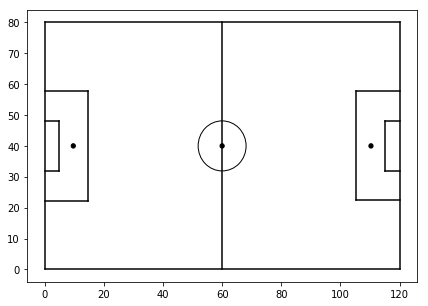

In [5]:
fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
plt.show()

---------

## Find all South Korea match files

1. Get all files in `/data/` directory;
2. Read JSON and concatenate all matches into pre-defined data frame;
3. Create data frame where team_name = @team_name

In [6]:
# get all files in directory
path = "/Users/steven/Documents/Developer/data_science/football/data/raw/events/"

def get_files(path):
    x = os.listdir(path)
    return [os.path.splitext(i)[0] for i in x] 

In [7]:
data_id = get_files(path)

# defined in previous cell, can redefine if necessary
directory = path

# consequently read the json and concatenate into a pre-defined dataframe
all_korea = pd.DataFrame()
for i in data_id:
    with open(directory + str(i) + '.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_korea.empty:
        all_korea = df
    else:
        all_korea = pd.concat([all_korea, df], join = 'outer', sort = False)

In [9]:
all_korea = all_korea[all_korea.team_name == "South Korea"]

In [10]:
# count total number of dribble
total_dribble = all_korea.groupby('player_name')['type_name'].apply(lambda x:(x=='Dribble').sum()).reset_index(name='total_dribble')

# number of dribble completed
dribble_complete = all_korea.groupby('player_name')['dribble_outcome_name'].apply(lambda x: (x=='Complete').sum()).reset_index(name='dribble_completed')

# total number of pass
total_pass = all_korea.groupby('player_name')['type_name'].apply(lambda x: (x=='Pass').sum()).reset_index(name='total_pass')

# number of incomplete pass
pass_incomplete = all_korea.groupby('player_name')['pass_outcome_name'].count().reset_index(name='incomplete_pass')

# number of times being dispossessed
dispossessed = all_korea.groupby('player_name')['type_name'].apply(lambda x: (x=='Dispossessed').sum()).reset_index(name='dispossessed')

In [11]:
df_list = [total_dribble,
           dribble_complete,
           total_pass,
           pass_incomplete,
           dispossessed]

summary_data = reduce(lambda x,y : pd.merge(x,y, on = 'player_name'), df_list)

summary_data

,player_name,total_dribble,dribble_completed,total_pass,incomplete_pass,dispossessed
0,Chul Hong,2,1,36,14,0
1,Hee-Chan Hwang,11,6,34,18,2
2,Heung-Min Son,17,12,79,15,7
3,Hyun-Soo Jang,1,1,95,16,0
4,Hyun-Woo Cho,0,0,63,28,0
5,Ja-Cheol Koo,0,0,24,3,4
6,Jae-Sung Lee,7,3,114,19,6
7,Joo-Ho Park,1,1,10,3,0
8,Min-Woo Kim,0,0,64,22,3
9,Se-Jong Ju,0,0,41,12,1


---------

## Visualising Ball Distribution Inefficiency 

The following section measures the passing efficiency of the South Korean team. Firstly, we take the dispossessions, depicted by $x$, plus the incomplete passes, $y$, divided by total passes attempted minus one, $z-1$.

$$\sum_{i=1}^{n}score = \frac{x_i + y_i}{z_i - 1}$$

Text(0.5, 1.0, 'Passing Inefficiency')

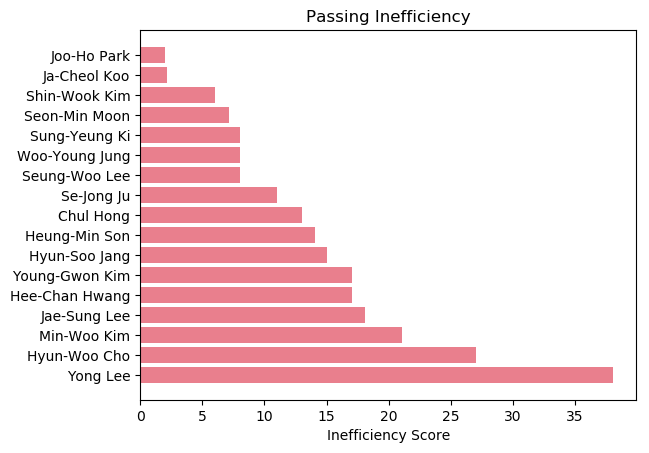

In [57]:
# create the weighted score data.frame
score = {
    'id' : sorted_dispossessions_i['player_name'],
    'score' : sorted_dispossessions_i['incomplete_pass'] 
            + sorted_dispossessions_i['dispossessed'] 
            / sorted_dispossessions_i['total_pass']-1
}

# assign and sort
calculated_scores=pd.DataFrame(score,columns=['id','score'])
calculated_scores=calculated_scores.sort_values(by='score',ascending=0)

# remove players with < 0 score
calculated_scores.drop(calculated_scores[calculated_scores.score <= 0].index, inplace=True)

# plot
objects=(list(calculated_scores['id']))
y_pos=np.arange(len(objects))
metric=np.array(calculated_scores['score'])

plt.barh(y_pos,metric,align='center',alpha=0.5,color='#D4011D')
plt.yticks(y_pos,objects)
plt.xlabel('Inefficiency Score')
plt.title('Passing Inefficiency')